# MNIST Number: Classification

Classify the images as numbers. 
* Calculating loss for classification problems.
* Optimizing your model
* Applying regularization.
* Following best practices in development and debugging.

In [2]:
# Reset environment for a new run
% reset -f

## Import required packages

In [3]:
from os.path import join # for joining file pathnames

import sys

import pandas as pd
# Set Pandas display options
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

import unittest

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Get Data

**MNIST** is a dataset of images of the numbers 0 to 9.

### Load Data

In [4]:
mnistDf_backup = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/mnist_train_small.csv",sep=",",header=None)

mnistDf_backup

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Shuffle data

In [5]:
# Shuffle
mnistDf_backup.sample(frac=1).reset_index(drop=True)
# Use the first 5000 examples for faster prototyping
mnistDf = mnistDf_backup[0:5000]

mnistDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4996,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4997,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Understanding the Data Format

* Each row represents one labeled example. 
* Column 0 represents the label that a human rater has assigned for one handwritten digit. `For example, if Column 0 contains '6', then a human rater interpreted the handwritten character as the digit '6'.`  
* The ten digits 0-9 are each represented with a unique class label for each possible digit. Thus, this is a multi-class classification problem with 10 classes.
* Columns 1 through 784 contain the feature values, one per pixel for the 28×28=784 pixel values. 
* The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent shades of gray. 
* Most of the pixel values are 0; you may want to take a minute to confirm that they aren't all 0.

### View data for a given example

In [6]:
exampleNo = 1000 # @param
exampleData = mnistDf.iloc[exampleNo][1:]
exampleDigit = exampleData.values.reshape(28,28)
print(exampleDigit)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  82 152 233 254 213 152 112  21   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  82 163 243 192 232 253 252 253 252 223  40   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  41  82   0   0   0   0   0  62 142 25

## Check for Class Imbalance

([<matplotlib.axis.XTick at 0x7f61899480f0>,
 <a list of 11 Text major ticklabel objects>)

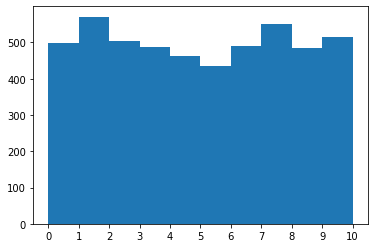

In [7]:
# Calculate the number of classes
numClasses = mnistDf.iloc[:,0].unique().shape[0]

# Plot histogram of class distribution
plt.hist(mnistDf.iloc[:,0], bins=range(numClasses+1))
plt.xticks(range(numClasses+1))

The histogram shows that the 10 classes are roughly equally represented.

## Shuffle and get statistically balanced features and labels

In [8]:
# Shuffle data
mnistDf = mnistDf.sample(frac=1).reset_index(drop=True)

# Get feature and labels
mnistFeatures = mnistDf.iloc[:,1:784+1].copy(deep=True)
mnistLabels = mnistDf.iloc[:,0].copy(deep=True)

## Preprocess Feature Data


### Scale Features

Scale the data values to `[0,1]` since the values are bounded to `[0,255]` and do not contain outliers.

In [9]:
def minMaxScaler(arr):
  min = np.min(arr)
  max = np.max(arr)
  arr = (arr-min)/max
  return arr

for featureIdx in range(mnistFeatures.shape[1]):
  mnistFeatures.iloc[:,featureIdx] = minMaxScaler(mnistFeatures.iloc[:,featureIdx])

### Check Feature Data Statistics

In [10]:
mnistFeatures.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000.0,5000.0,5000.0,5000.0,5000.0,...,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,0.0,0.0,0.0,0.0
mean,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,...,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan
min,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan
25%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan
50%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan
75%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,nan
max,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,nan,nan,nan,nan


Observation:<br>
* Since some of the feature columns are all zeros, the scaling function divided by 0 (because `np.max` returns 0). 
* The division by 0 resulted in NaN values. This result shows you how easily NaNs can arise in engineered data. 
* The `describe` function does not detect every occurrence of NaN (or None). Instead, use the command `DataFrame.isnull().any()`.

*Note*: Given the maximum value of the feature data is 255, you could simply divide the input by 255 instead of using min-max scaling, and avoid introducing NaNs.

### Explore Feature Data 

In [11]:
# Reload features
mnistFeatures = mnistDf.iloc[:,1:784+1].copy(deep=True)

# Get feature stats
mnistFeatures.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,...,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.2,...,4.0,2.6,1.6,1.1,0.6,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.2,0.4,0.5,0.6,0.6,0.7,0.8,0.7,0.5,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,4.0,2.1,2.6,5.5,...,28.0,21.9,17.8,14.5,11.1,7.6,4.5,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,3.4,5.1,5.4,9.0,9.9,11.2,10.5,12.0,12.0,11.0,9.4,7.7,5.2,1.0,0.6,3.5,0.9,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,253.0,133.0,133.0,253.0,...,255.0,255.0,255.0,255.0,255.0,253.0,255.0,62.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,190.0,253.0,203.0,253.0,255.0,255.0,254.0,255.0,255.0,253.0,254.0,253.0,254.0,68.0,43.0,244.0,62.0,0.0,0.0,0.0,0.0


### Check for nulls

In [12]:
mnistFeatures.isnull().any()

1      False
2      False
3      False
4      False
5      False
       ...  
780    False
781    False
782    False
783    False
784    False
Length: 784, dtype: bool

### Scale Features and handle zeroes

In [13]:
def minMaxScaler(arr):
  max = np.max(arr)
  if(max!=0):  # avoid /0
    min = np.min(arr)
    arr = (arr-min)/max
  return arr

# Scale features
for featureIdx in range(mnistFeatures.shape[1]):
  mnistFeatures.iloc[:,featureIdx] = minMaxScaler(mnistFeatures.iloc[:,featureIdx])

### Check Scaled Feature statistics

In [14]:
mnistFeatures.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,...,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


We do not remove All-Zero Features:<br>
The training data and validation data might have different all-zero features. Since we should not use validation data to make modeling decisions, we cannot remove only those features that are all-zero in both. Furthermore, data in the future might have different characteristics. There are pros and cons in either case.

## Establish Baseline

The simplest baseline is **predicting the most common class**. 
 * From the class balance histogram, the most common class is `1`. 
 * We check the accuracy when always predicting `1`.

In [15]:
np.sum(mnistLabels==1)*1.0/mnistLabels.shape[0]*100

11.42

The baseline accuracy is 11.42%. Our **starting model should beat this accuracy**.

## Model

### Function to display training result

In [16]:
def showClassificationResults(trainHistory):
  """Function to:
   * Print final loss & accuracy.
   * Plot loss & accuracy curves.

  Args:
    trainHistory: object returned by model.fit
  """

  # Print final loss and accuracy
  print("Final training loss: " + str(trainHistory.history['loss'][-1]))
  print("Final validation loss: " + str(trainHistory.history['val_loss'][-1]))
  print("Final training accuracy: " + str(trainHistory.history['accuracy'][-1]))
  print("Final validation accuracy: " + str(trainHistory.history['val_accuracy'][-1]))

  # Plot loss and accuracy curves
  f = plt.figure(figsize=(10,4))
  axLoss = f.add_subplot(121)
  axAcc = f.add_subplot(122)
  axLoss.plot(trainHistory.history['loss'])
  axLoss.plot(trainHistory.history['val_loss'])
  axLoss.legend(['Training loss', 'Validation loss'], loc='best')
  axLoss.set_xlabel('Training epochs')
  axLoss.set_ylabel('Loss')
  axAcc.plot(trainHistory.history['accuracy'])
  axAcc.plot(trainHistory.history['val_accuracy'])
  axAcc.legend(['Training accuracy', 'Validation accuracy'], loc='best')
  axAcc.set_xlabel('Training epochs')
  axAcc.set_ylabel('Accuracy')

### 1. Start with a simple Linear Model

* Linear model 
* One hidden layer
* Experiment with epochs and batch size

Goal is to get accuracy > 11.42%


Final training loss: 3.3848750591278076
Final validation loss: 3.8581202030181885
Final training accuracy: 0.14474999904632568
Final validation accuracy: 0.15199999511241913


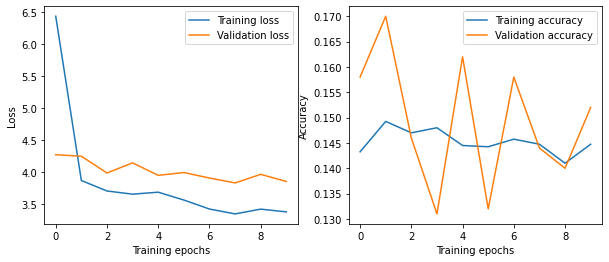

In [17]:
model = None
# Define
model = keras.Sequential()
model.add(keras.layers.Dense(mnistFeatures.shape[1], activation='linear', input_dim=mnistFeatures.shape[1]))
model.add(keras.layers.Dense(1, activation='linear'))
# Compile
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])
# Train
trainHistory = model.fit(mnistFeatures, mnistLabels, 
                         epochs=10, 
                         batch_size=100,
                         validation_split=0.2, 
                         verbose=0)
# Plot
showClassificationResults(trainHistory)

The accuracy is terrible!

Possible cause: We followed the same procedure as for the regression problem. We need an adaptation for a classification problem.

* Last layer Activation function
  * In regression, the last layer uses a linear activation function. 
  * In classification, the last layer cannot use a linear transform. Instead, one option is a softmax transform. 

* Loss function
  * In regression, the loss is calculated using MSE 
  * In classification, loss is calculated using crossentropy. 
  
Before running your model, we must write a test to validate the output values, that would detect the anomalous output.

### Fix Linear Model Activation and Loss Functions
* Since it is a multi-class classification problem, we use `softmax` activation in the output layer.
* Since the labels are integers instead of one-hot encodings, we use `sparse_categorical_crossentropy` instead of `categorical_crossentropy` so that we avoid converting the integers to one-hot encoding.

Final training loss: 0.1617397665977478
Final validation loss: 0.41671472787857056
Final training accuracy: 0.9549999833106995
Final validation accuracy: 0.906000018119812


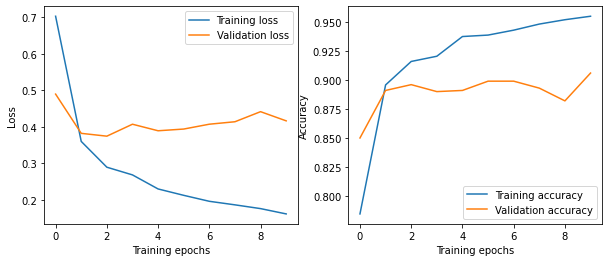

In [18]:
model = None
# Define
model = keras.Sequential()
model.add(keras.layers.Dense(mnistFeatures.shape[1], activation='linear', input_dim = mnistFeatures.shape[1]))
model.add(keras.layers.Dense(10, activation='softmax'))
# Compile
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train
trainHistory = model.fit(mnistFeatures, mnistLabels, 
                         epochs=10, 
                         batch_size=100,
                         validation_split=0.2, 
                         verbose=0)
# Plot
showClassificationResults(trainHistory)

The accuracy has improved too. We are on the right track.

### 2. Use a Nonlinear Model
* Use `relu` activation functions instead of `linear` activation functions in hidden layer.

Final training loss: 0.033885616809129715
Final validation loss: 0.2501942813396454
Final training accuracy: 0.9962499737739563
Final validation accuracy: 0.9390000104904175


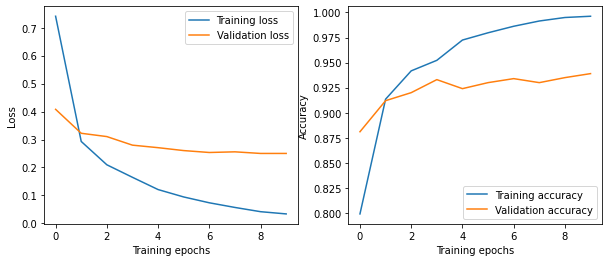

In [19]:
model = None
# Define
model = keras.Sequential()
model.add(keras.layers.Dense(mnistFeatures.shape[1], activation='relu', input_dim=mnistFeatures.shape[1]))
model.add(keras.layers.Dense(10, activation='softmax'))
# Compile
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train
trainHistory = model.fit(mnistFeatures, mnistLabels, 
                         epochs=10, 
                         batch_size=100,
                         validation_split=0.2, 
                         verbose=0)
# Plot
showClassificationResults(trainHistory)

The accuracy of the nonlinear model is significantly better than of the linear model.

### Improve the Non Linear model

* Add a second hidden layer to increasing the model's capacity.


Final training loss: 0.001961407018825412
Final validation loss: 0.2510479986667633
Final training accuracy: 1.0
Final validation accuracy: 0.9459999799728394


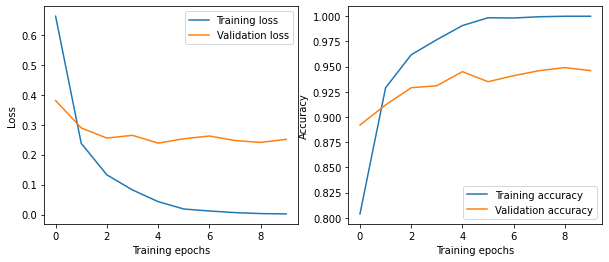

In [20]:
model = None
# Define
model = keras.Sequential()
model.add(keras.layers.Dense(mnistFeatures.shape[1], activation='relu', input_dim = mnistFeatures.shape[1]))
model.add(keras.layers.Dense(mnistFeatures.shape[1], activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
# Compile
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train
trainHistory = model.fit(mnistFeatures, mnistLabels, 
                         epochs=10, 
                         batch_size=100,
                         validation_split=0.2, 
                         verbose=0)
# Plot
showClassificationResults(trainHistory)

The model has training and validation accuracies of 100% and 94%. Since the neural net returns similar accuracy with 1 or 2 layers, we use the simpler model with 1 layer.

The model begin to overfit the training data if we train for long enough? Your model starts overfitting training data at the point when the validation loss starts increasing.

### 3. Check for Training/Validation Data Skew

It is common to have validation accuracy is a little worse than our training accuracy. 
* The commonest cause is having different distributions of data and labels in training and validation. 
* Confirm that the distribution of classes in training and validation data is similar.

[]

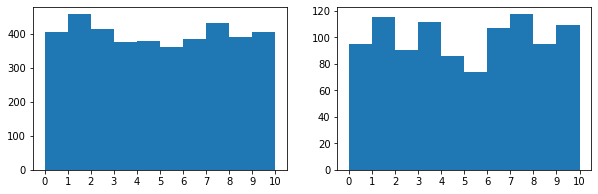

In [26]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(1,2,1)
plt.hist(mnistLabels[0:int(len(mnistLabels)*8/10)], bins=range(numClasses+1))
plt.xticks(range(numClasses+1))
ax2 = f.add_subplot(1,2,2,)
plt.hist(mnistLabels[int(len(mnistLabels)*8/10):-1], bins=range(numClasses+1))
plt.xticks(range(numClasses+1))
plt.plot()

### 4. Apply Dropout Regularization

* Removes a random selection of a fixed number of units in a network layer for a single gradient step. 
  * Improves generalization at a dropout rate of between 10% and 50% of neurons.

Final training loss: 0.03551842272281647
Final validation loss: 0.22847570478916168
Final training accuracy: 0.9929999709129333
Final validation accuracy: 0.9480000138282776


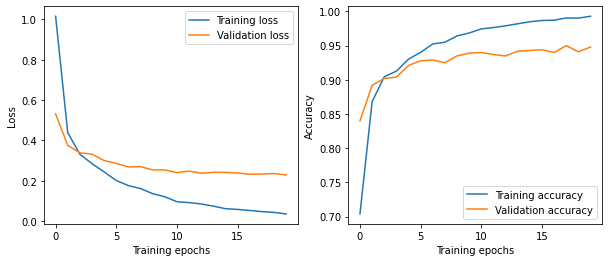

In [33]:
from keras import regularizers
dropoutLambda = 0.5 #@param

model = None
# Define model
model = keras.Sequential()
model.add(keras.layers.Dense(mnistFeatures.shape[1], activation='relu', input_dim=mnistFeatures.shape[1]))
model.add(keras.layers.Dropout(dropoutLambda, noise_shape=(1, mnistFeatures.shape[1])))
model.add(keras.layers.Dense(10, activation='softmax'))
# Compile
model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# Train
trainHistory = model.fit(mnistFeatures, mnistLabels,
                        epochs=20,
                        batch_size=100,
                        validation_split=0.2,
                        verbose=0)
# Plot
showClassificationResults(trainHistory)

Does not improve the results in this case. 

However, at a dropout of 0.5 and 20 epochs, the difference in loss decreases, though both training and validation loss decrease in absolute terms.

### 5. Check Accuracy for Data Slices

For classification problems, always check the metrics by class to ensure your model predicts well across all classes using `sklearn.metrics.classification_report`. 
* In the output, the rows with indices 0 to 9 correspond to the classes for the labels 0 to 9. 
* The columns "Precision", "Recall", and "F1-Score" correspond to the respective classification metrics for each class. 
* "Support" is the number of examples for the class in question.

In [37]:
from sklearn.metrics import classification_report
mnistPred = np.argmax(model.predict(x = mnistFeatures), axis=-1)
print(classification_report(mnistLabels, mnistPred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       499
           1       0.99      0.99      0.99       571
           2       0.98      0.99      0.99       504
           3       0.99      0.97      0.98       487
           4       0.99      0.99      0.99       464
           5       0.99      0.99      0.99       434
           6       1.00      0.99      0.99       491
           7       0.98      0.99      0.99       550
           8       1.00      0.98      0.99       485
           9       0.99      0.99      0.99       515

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



The classification metrics are very uniform across all classes, which is perfect. 

In the classification problem, in case any metric is lower for a class, then you should investigate why the model has lower-quality predictions for that class.

### 6. Test for Anomalous Values

Before running a model, a test to validate the output values would detect the anomalous output. 
* Test whether the distribution of predicted labels on the training dataset is similar to the actual distribution of training labels. 
  * A simple statistical implementation of this concept is to compare the standard deviation and mean of the predicted and actual labels.

#### Mean and SD of actual labels

In [38]:
print("Mean of actual labels: " + str(np.mean(mnistLabels)))
print("Std dev of actual labels: " + str(np.std(mnistLabels)))

Mean of actual labels: 4.4754
Std dev of actual labels: 2.9147546792140018


#### Mean and SD of predicted labels
Tests to check if the mean and standard deviation of the predicted labels falls within the expected range. 
* The expected range defined in the tests below is somewhat arbitrary. 
* In practice, you will tune the range thresholds to accommodate natural variation in predictions.

In [39]:
class mlTest(unittest.TestCase): 
  '''Class to test statistics of predicted output on training features against
     statistics of labels to validate that model predictions are in the expected range.
  '''
     
  def testStd(self):
    y = model.predict(mnistFeatures)
    yStd = np.std(y)
    yStdActual = np.std(mnistLabels)
    deltaStd = 0.05
    errorMsg = 'Std dev of predicted values ' + str(yStd) + \
               ' and actual values ' + str(yStdActual) + \
               ' differs by >' + str(deltaStd) + '.'
    self.assertAlmostEqual(yStd, yStdActual, delta=deltaStd, msg=errorMsg)

  def testMean(self):
    y = model.predict(mnistFeatures)
    yMean = np.mean(y)
    yMeanActual = np.mean(mnistLabels)
    deltaMean = 0.05
    errorMsg = 'Mean of predicted values ' + str(yMean) + \
               ' and actual values ' + str(yMeanActual) + \
               ' differs by >' + str(deltaMean) + '.'
    self.assertAlmostEqual(yMean, yMeanActual, delta=deltaMean, msg=errorMsg)

#### Train a model with the wrong loss calculation

In [44]:
model = None
# Define
model = keras.Sequential()
model.add(keras.layers.Dense(mnistFeatures.shape[1], activation='relu', input_dim=mnistFeatures.shape[1]))
model.add(keras.layers.Dense(1, activation='linear'))
# Compile
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])
# Train
trainHistory = model.fit(mnistFeatures, mnistLabels, 
                         epochs=10, 
                         batch_size=100,
                         validation_split=0.2, 
                         verbose=0)

test_suite = unittest.TestLoader().loadTestsFromTestCase(mlTest)
unittest.TextTestRunner(verbosity=1, stream=sys.stderr).run(test_suite)

FF
FAIL: testMean (__main__.mlTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-39-e0847df727fb>", line 20, in testMean
    self.assertAlmostEqual(yMean, yMeanActual, delta=deltaMean, msg=errorMsg)
AssertionError: 4.3654475 != 4.4754 within 0.05 delta : Mean of predicted values 4.3654475 and actual values 4.4754 differs by >0.05.

FAIL: testStd (__main__.mlTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-39-e0847df727fb>", line 12, in testStd
    self.assertAlmostEqual(yStd, yStdActual, delta=deltaStd, msg=errorMsg)
AssertionError: 2.7218225 != 2.9147546792140018 within 0.05 delta : Std dev of predicted values 2.7218225 and actual values 2.9147546792140018 differs by >0.05.

----------------------------------------------------------------------
Ran 2 tests in 0.475s

FAILED (failures=2)


<unittest.runner.TextTestResult run=2 errors=0 failures=2>

Since the tests fail, check the data distribution of predicted labels for anomalies.

[]

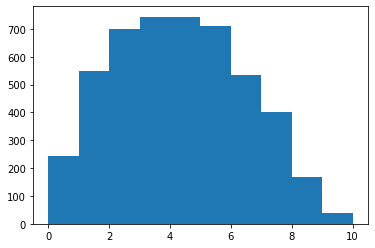

In [42]:
yPred = model.predict(mnistFeatures)
plt.hist(yPred, bins=range(11))
plt.plot()

Given equally represented classes, the predicted labels are clearly skewed. From this plot, a possible explanation is that your loss calculation does not appear to be weighting all classes equally. This anomaly is a hint that your loss calculation is incorrect.

#### Train model after Fixing Loss Calculation

* Fix the loss calculation by setting the output layer's activation to `softmax`.
* Set the model's loss to `sparse_categorical_crossentropy`.
* Set the number of units in the output layer to 10 corresponding to the 10 classes.
* Adapt the tests to the modified output layer.

In [45]:
model = None
# Define
model = keras.Sequential()
model.add(keras.layers.Dense(mnistFeatures.shape[1], activation='relu', input_dim=mnistFeatures.shape[1]))
model.add(keras.layers.Dense(10, activation='softmax'))
# Compile
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train
trainHistory = model.fit(mnistFeatures, mnistLabels, 
                         epochs=10, 
                         batch_size=100,
                         validation_split=0.2, 
                         verbose=0)

test_suite = unittest.TestLoader().loadTestsFromTestCase(mlTest)
unittest.TextTestRunner(verbosity=1, stream=sys.stderr).run(test_suite)

FF
FAIL: testMean (__main__.mlTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-39-e0847df727fb>", line 20, in testMean
    self.assertAlmostEqual(yMean, yMeanActual, delta=deltaMean, msg=errorMsg)
AssertionError: 0.1 != 4.4754 within 0.05 delta : Mean of predicted values 0.1 and actual values 4.4754 differs by >0.05.

FAIL: testStd (__main__.mlTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-39-e0847df727fb>", line 12, in testStd
    self.assertAlmostEqual(yStd, yStdActual, delta=deltaStd, msg=errorMsg)
AssertionError: 0.29254058 != 2.9147546792140018 within 0.05 delta : Std dev of predicted values 0.29254058 and actual values 2.9147546792140018 differs by >0.05.

----------------------------------------------------------------------
Ran 2 tests in 0.471s

FAILED (failures=2)


<unittest.runner.TextTestResult run=2 errors=0 failures=2>

## Conclusion

* Calculate loss correctly for your problem.
* Verify and unit test your engineered data.
* Find the right model capacity through experimentation.
* Find the best regularization through experimentation.
* Check quality on data slices.